# FL
* Fish Lake Small Domain
## Create NetCDF from Tifs

Created new env: From *rasterio*, a copy of that to install rioxarray, now *rasterio_copy*


In [2]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio import plot, mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
import rasterio
# import rasterstats

In [3]:
!conda env list

# conda environments:
#
base                     C:\Users\Lumbr\miniconda3
raster                   C:\Users\Lumbr\miniconda3\envs\raster
rasterio                 C:\Users\Lumbr\miniconda3\envs\rasterio
rasterio_copy         *  C:\Users\Lumbr\miniconda3\envs\rasterio_copy
unload                   C:\Users\Lumbr\miniconda3\envs\unload



In [4]:
# labels and cosntants 
# titles
title = 'Fish Lake'

# labels 
dce_label = 'distance to canopy edge (m)'
dah_label = 'diurnal anisotropic heat index'
slope_label = 'slope (degrees)'
aspect_label = 'aspect (degrees)'
snow_label = 'snow depth (m)'

dceclassdict = {1: 'Large Clusters', 2: 'Small Clusters', 3: 'Edges', 4: 'Small Gaps', 5: 'Large Gaps'}

In [5]:
# # Small Domain for snow depth.. (previous code) 
# tif_snowdepth = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Data/Output/FL_smalldomain_snowdepth.tif", masked=True)

# # should be able to import the entire domain for FL, then when I reproject_match, it clips to the extent of the snow depth 
# tif_aspect = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Data/Output/FL_aspect.tif", masked=True)
# tif_slope = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Data/Output/FL_slope.tif", masked=True)
# tif_chm = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Data/Output/FL_chm_snowoff_meters.tif", masked=True)

# # these are all small domains for now, but could simply switch to full and reproject_march to the small domain 
# tif_dem = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Data/Output/FL_smalldomain_dtm_snowoff.tif", masked=True)
# tif_dce = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Data/Output/FL_smalldomain_dce.tif", masked=True)
# tif_dah = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Data/Output/FL_smalldomain_dah.tif", masked=True)
# tif_tpi = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Data/Output/FL_smalldomain_tpi.tif", masked=True)

# # Put it all together 
# ds = xr.Dataset({"snowdepth":tif_snowdepth,
#                  "dem":tif_dem.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "chm":tif_chm.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "aspect":tif_aspect.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "slope":tif_slope.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "dce":tif_dce.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "tpi":tif_tpi.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
#                  "dah":tif_dah.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear)})

In [10]:
# Results from model simulations, reproject match everything to this raster
tif_snowdepth = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_snowdepth.tif", masked=True)

# should be able to import the entire domain for FL, then when I reproject_match, it clips to the extent of the snow depth 
# raw datasets 
tif_dtm_snowoff = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_dtm_snowoff.tif", masked=True)
tif_dsm_snowoff = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_dsm_snowoff.tif", masked=True)
tif_dtm_snowon = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_dtm_snowon.tif", masked=True)
tif_dsm_snowon = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_dsm_snowon.tif", masked=True)

# simple calculations
tif_aspect = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_aspect.tif", masked=True)
tif_slope = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_slope.tif", masked=True)

tif_chm_snowoff = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_chm_snowoff.tif", masked=True)
tif_chmws = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_chmws.tif", masked=True)
tif_chmas = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_chmas.tif", masked=True)

tif_dce = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_dce.tif", masked=True)
tif_dah = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_dah.tif", masked=True)
tif_tpi = rioxarray.open_rasterio("/Users/Lumbr/OneDrive - UW/Documents/ArcGIS/Projects/Model/Data/FL/fl_tpi.tif", masked=True)

# Put it all together 
ds = xr.Dataset({"snowdepth":tif_snowdepth,
                 "dtm_snowoff":tif_dtm_snowoff.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "dsm_snowoff":tif_dsm_snowoff.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "dtm_snowon":tif_dtm_snowon.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "dsm_snowon":tif_dsm_snowon.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "aspect":tif_aspect.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "slope":tif_slope.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "chm_snowoff":tif_chm_snowoff.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "chmws":tif_chmws.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "chmas":tif_chmas.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "dce":tif_dce.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "tpi":tif_tpi.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear),
                 "dah":tif_dah.rio.reproject_match(tif_snowdepth, resampling = rasterio.enums.Resampling.bilinear)})

KeyboardInterrupt: 

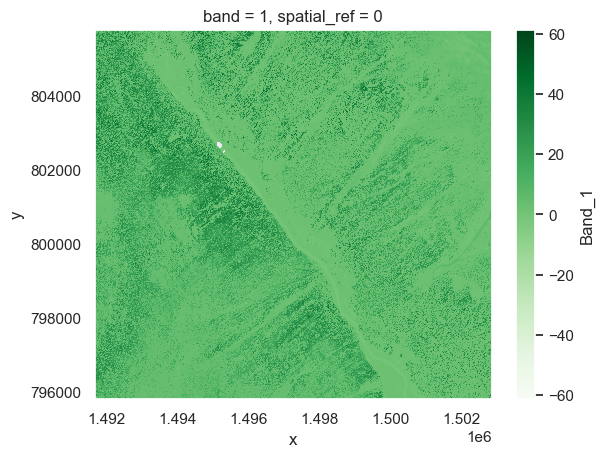

In [8]:
# ds.tpi.plot(vmin=-2, vmax=2)
ds.chm.plot(cmap='Greens')

### Aspect: 
* flat: -1 
* North: 0 - 22.5
* Northeast: 22.5 - 67.5
* East: 67.5 - 112.5 
* Southeast: 112.5 - 157.5 
* South: 157.5 - 202.5 
* Southwest: 202.5 - 247.5 
* West: 247.5 - 292.5 
* Northwest: 292.5 - 337.5 
* North: 337.5 - 360

In [9]:
# FL dtm snow off might be in feet (it's the origional dataset) 
ds['dtm_snowoff'] = ds['dtm_snowoff']*0.3048 #snow off dtm to meters
ds['dsm_snowoff'] = ds['dtm_snowoff']*0.3048 #snow off dsm to meters
ds['dtm_snowon'] = ds['dtm_snowon']*0.3048 #snow on dtm to meters
ds['dsm_snowon'] = ds['dtm_snowon']*0.3048 #snow on dsm to meters

ds['chm'] = ds['chm'].where(ds['chm'] >= 0, drop=True) # keep canopy height model above 0 
ds['slope'] = ds['slope'].where(ds['slope'] >= 0, drop=True) # keep slope above 0
ds['aspect'] = ds['aspect'].where(ds['aspect'] >= -1, drop=True) # keep aspect above -1 

ds['tpi'] = ds['tpi'].where(~(ds['tpi'] >  100), drop=True) # droping any strange tpi values
ds['tpi'] = ds['tpi'].where(~(ds['tpi'] < -100), drop=True) 

ds['dce'] = ds['dce'].where(~(ds['dce'] > 50), drop=True) # droping any gaps that are bigger than 50
ds['dce'] = ds['dce'].where(~(ds['dce'] < -50), drop=True) # droping any gaps that are smaller than -50

ds['dah'] = ds['dah'].where(~(ds['dah'] > 50), drop=True) # droping any gaps that are bigger than 50
ds['dah'] = ds['dah'].where(~(ds['dah'] < -50), drop=True) # droping any gaps that are smaller than -50

# ds['snowdepth'] = ds['snowdepth'].where(~(ds['snowdepth'] == -9999), drop=True) # dropping the -9999
ds['snowdepth'] = ds['snowdepth'].where(ds['snowdepth'] >= 0, drop=True) # only keeping snow depth >= 0 for now... coming back to this 
ds['snowdepth'] = ds['snowdepth'].where(ds['snowdepth'] < 20, drop=True) # only keeping snow depth < 20 for now... coming back to this 

### Proper reclassification groups

|group|name|DCE range|
|-|-|--:|
|group 1:|Large Gaps|3 <  DCE <=  8|
|group 2:|Small Gaps|1 <  DCE <=  3|
|group 3:|Edges|-1 <= DCE <=  1
|group 4:|Small Clusters|-3 <= DCE <= -1|
|group 5:|Large Clusters|      DCE <  -3|

In [10]:
# fix up dah classification for zero to be with negative values
dah_reclass = ds.dah.copy(deep=True)

dah_reclass = dah_reclass.where(dah_reclass <= 0, 1) # xarray.where cond = False, replace with value
dah_reclass = dah_reclass.where(dah_reclass > 0, -1)

# fix up dce classification so that it's clear groups
# xarray .where function becomes a mask when you use the ~ to negate the statement 

dce_reclass = ds.dce.copy(deep=True) # where cond = False, replace (unless we use the ~)                                

dce_reclass = dce_reclass.where(~(dce_reclass > 8), drop=True)                       # droping any gaps that are bigger than 8
dce_reclass = dce_reclass.where(~(( 3 <  dce_reclass) & (dce_reclass <=  8)), 500) # group 1: Large Gaps      3 <  DCE <=  8
dce_reclass = dce_reclass.where(~(( 1 <  dce_reclass) & (dce_reclass <=  3)), 400) # group 2: Small Gaps      1 <  DCE <=  3
dce_reclass = dce_reclass.where(~((-1 <= dce_reclass) & (dce_reclass <=  1)), 300) # group 3: Edges          -1 <= DCE <=  1
dce_reclass = dce_reclass.where(~((-3 <= dce_reclass) & (dce_reclass <  -1)), 200) # group 4: Small Clusters -3 <= DCE <=  1
dce_reclass = dce_reclass.where(~(dce_reclass <-3), 100)                             # group 5: Large Clusters       DCE <= -3

ds['dah_reclass'] = dah_reclass.copy(deep=True)
ds['dce_reclass'] = dce_reclass.copy(deep=True)

# Also saving these into the xarray dataframe, then else is nan for each group 
# only for my dce classification, but Giulia's for now 
ds['largeclusters'] = ds.dce_reclass.where(ds.dce_reclass == 100)
ds['smallclusters'] = ds.dce_reclass.where(ds.dce_reclass == 200)
ds['canopyedges']   = ds.dce_reclass.where(ds.dce_reclass == 300)
ds['smallgaps']     = ds.dce_reclass.where(ds.dce_reclass == 400)
ds['largegaps']     = ds.dce_reclass.where(ds.dce_reclass == 500)

### make different datasets for groups that are dah > 0 and dah < 0 to do statistics on 

In [11]:
# also need to create groups where each canopy edge group is broken up by DAH positive or negative 

# first, create two new dataframes for one positive and one negative dah
ds_dahpos = ds.where(ds.dah >= 0)
ds_dahneg = ds.where(ds.dah < 0)

# then, classify based on each different dataframe
dce_dahpos_reclass = ds_dahpos.dce.copy(deep=True) 
dce_dahneg_reclass = ds_dahneg.dce.copy(deep=True)                                

dce_dahpos_reclass = dce_dahpos_reclass.where(~(dce_dahpos_reclass > 8), drop=True)                            # droping any gaps that are bigger than 8
dce_dahneg_reclass = dce_dahneg_reclass.where(~(dce_dahneg_reclass > 8), drop=True)                            # droping any gaps that are bigger than 8

dce_dahpos_reclass = dce_dahpos_reclass.where(~(( 3 <  dce_dahpos_reclass) & (dce_dahpos_reclass <=  8)), 500) # group 1: Large Gaps      3 <  DCE <=  8, only on DAH > 0 ds
dce_dahneg_reclass = dce_dahneg_reclass.where(~(( 3 <  dce_dahneg_reclass) & (dce_dahneg_reclass <=  8)), 500) # group 1: Large Gaps      3 <  DCE <=  8, only on DAH < 0 ds

dce_dahpos_reclass = dce_dahpos_reclass.where(~(( 1 <  dce_dahpos_reclass) & (dce_dahpos_reclass <=  3)), 400) # group 2: Small Gaps      1 <  DCE <=  3, only on DAH > 0 ds
dce_dahneg_reclass = dce_dahneg_reclass.where(~(( 1 <  dce_dahneg_reclass) & (dce_dahneg_reclass <=  3)), 400) # group 2: Small Gaps      1 <  DCE <=  3, only on DAH < 0 ds

dce_dahpos_reclass = dce_dahpos_reclass.where(~((-1 <= dce_dahpos_reclass) & (dce_dahpos_reclass <=  1)), 300) # group 3: Edges          -1 <= DCE <=  1 , only on DAH > 0 ds
dce_dahneg_reclass = dce_dahneg_reclass.where(~((-1 <= dce_dahneg_reclass) & (dce_dahneg_reclass <=  1)), 300) # group 3: Edges          -1 <= DCE <=  1, only on DAH < 0 ds

dce_dahpos_reclass = dce_dahpos_reclass.where(~((-3 <= dce_dahpos_reclass) & (dce_dahpos_reclass <  -1)), 200) # group 4: Small Clusters -3 <= DCE <=  1, only on DAH > 0 ds
dce_dahneg_reclass = dce_dahneg_reclass.where(~((-3 <= dce_dahneg_reclass) & (dce_dahneg_reclass <  -1)), 200) # group 4: Small Clusters -3 <= DCE <=  1, only on DAH < 0 ds

dce_dahpos_reclass = dce_dahpos_reclass.where(~(dce_dahpos_reclass <-3), 100)                                  # group 5: Large Clusters       DCE <= -3, only on DAH > 0 ds 
dce_dahneg_reclass = dce_dahneg_reclass.where(~(dce_dahneg_reclass <-3), 100)                                  # group 5: Large Clusters       DCE <= -3, only on DAH < 0 ds

# add this to our other dataframe so it's a bit easier to work with when needed 
ds['dce_dahpos_reclass'] = dce_dahpos_reclass.copy(deep=True)
ds['dce_dahneg_reclass'] = dce_dahneg_reclass.copy(deep=True)

In [12]:
# We want all the snow depth values.. for each dce group

# Also saving these into the xarray dataframe, then else is nan for each group 
ds['largeclusters_snowdepth'] = ds.snowdepth.where(ds.dce_reclass == 100)
ds['smallclusters_snowdepth'] = ds.snowdepth.where(ds.dce_reclass == 200)
ds['canopyedges_snowdepth']   = ds.snowdepth.where(ds.dce_reclass == 300)
ds['smallgaps_snowdepth']     = ds.snowdepth.where(ds.dce_reclass == 400)
ds['largegaps_snowdepth']     = ds.snowdepth.where(ds.dce_reclass == 500)

# And, we want (from those) where dah is positive or negative 
ds['largeclusters_posdah_snowdepth'] = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass == 100))
ds['largeclusters_negdah_snowdepth'] = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass == 100))

ds['smallclusters_posdah_snowdepth'] = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass == 200))
ds['smallclusters_negdah_snowdepth'] = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass == 200))

ds['canopyedges_posdah_snowdepth']   = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass == 300))
ds['canopyedges_negdah_snowdepth']   = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass == 300))

ds['smallgaps_posdah_snowdepth']     = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass == 400))
ds['smallgaps_negdah_snowdepth']     = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass == 400))

ds['largegaps_posdah_snowdepth']     = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass == 500))
ds['largegaps_negdah_snowdepth']     = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass == 500))

## Plot to make sure everything looks okay 

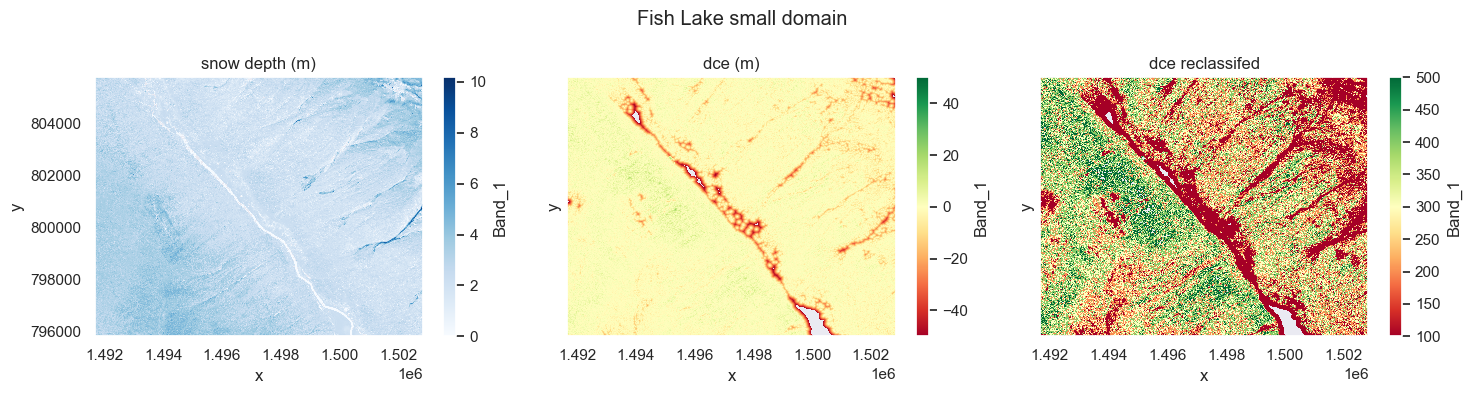

In [11]:
f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4))

f.suptitle('Fish Lake small domain')

ds.snowdepth.plot(ax=axes[0], cmap='Blues')
ds.dce.plot(ax=axes[1], cmap='RdYlGn')
ds.dce_reclass.plot(ax=axes[2], cmap='RdYlGn')

axes[0].set_title('snow depth (m)')
axes[1].set_title('dce (m)')
axes[2].set_title('dce reclassifed')

plt.tight_layout()

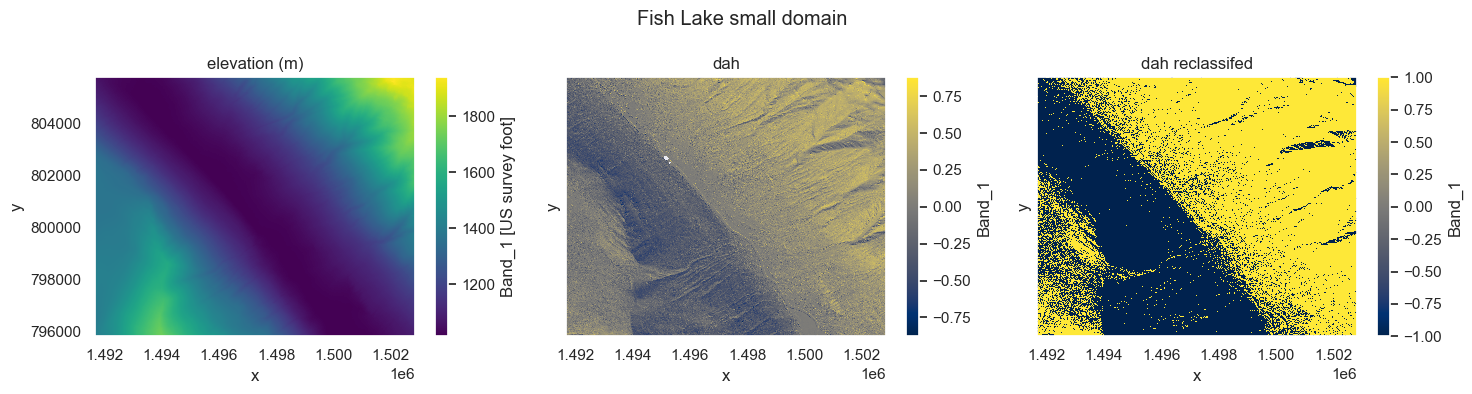

In [12]:
f, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4))

f.suptitle('Fish Lake small domain')

ds.dem.plot(ax=axes[0], cmap='viridis')
ds.dah.plot(ax=axes[1], cmap='cividis')
ds.dah_reclass.plot(ax=axes[2], cmap='cividis')

axes[0].set_title('elevation (m)')
axes[1].set_title('dah')
axes[2].set_title('dah reclassifed')

plt.tight_layout()

## Write the cleaned dataset to a netcdf to open later

In [13]:
# ds.to_netcdf('/Users/Lumbr/OneDrive - UW/Documents/Washington/EasternCascades/Python/Output/fl_smalldomain_create_netcdf.nc')
ds.to_netcdf('/Users/Lumbr/OneDrive - UW/Documents/Washington/EasternCascades/Python/Output/fl_model_create_netcdf.nc')

In [14]:
# ds2 = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/EasternCascades/Python/Output/fl_smalldomain_create_netcdf.nc')
ds2 = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/EasternCascades/Python/Output/fl_model_create_netcdf.nc')
ds2

<xarray.Dataset>
Dimensions:                         (x: 3725, y: 3330, band: 1)
Coordinates:
  * x                               (x) float64 1.492e+06 ... 1.503e+06
  * y                               (y) float64 8.058e+05 ... 7.958e+05
  * band                            (band) int32 1
Data variables: (12/33)
    snowdepth                       (band, y, x) float32 ...
    dem                             (band, y, x) float32 ...
    chm                             (band, y, x) float32 ...
    aspect                          (band, y, x) float32 ...
    slope                           (band, y, x) float32 ...
    dce                             (band, y, x) float32 ...
    ...                              ...
    canopyedges_negdah_snowdepth    (band, y, x) float32 ...
    smallgaps_posdah_snowdepth      (band, y, x) float32 ...
    smallgaps_negdah_snowdepth      (band, y, x) float32 ...
    largegaps_posdah_snowdepth      (band, y, x) float32 ...
    largegaps_negdah_snowdepth      (band, y, x) float32 ...
    spatial_ref                     int32 ...